# Import packages

In [13]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import sys
import forceatlas2
from fa2 import ForceAtlas2
import igraph
import cairocffi

# Define custom functions

In [40]:
def network_preprocessing(date,method,ts_type):
    
    """Import the network adjacency matrix from a .csv file, converts it into a networkx
    diGraph object"""
    
    # Convert date to string
    final_date_transformed = date.replace("-","_")
    
    
    # Import file
    filename = "./Data/Estimated_networks/Demirer_" +\
                  method+"_"+ts_type+"_"+final_date_transformed+".csv"

    network_matrix = np.genfromtxt(filename,
                              delimiter=',',skip_header = 1,usecols = np.arange(1,107))
    
    # Zero out the diagonal
    np.fill_diagonal(network_matrix,0)
    
    
    # Convert it into networkX object
    network = nx.from_numpy_matrix(network_matrix, create_using=nx.DiGraph)
    
    return network

# Import data

In [41]:
# Parameters
date = "2008-09-15"
method = "NS"
ts_type = "volatility"

# Import network
G = network_preprocessing(date,method,ts_type)

## Variable names

In [42]:
df = pd.read_csv('./Data/Stock_prices/Demirer2017_dataset.csv',sep=";", header=0)

print(df.head())

   dd/mm/yy   hsba.ln  X8306.to    bnp.fr       jpm    dbk.xe   barc.ln  \
0  12/09/03  0.000081  0.000258  0.000473  0.000130  0.000163  0.000457   
1  15/09/03  0.000028  0.000258  0.000204  0.000103  0.000155  0.000112   
2  16/09/03  0.000070  0.001790  0.000227  0.000111  0.000188  0.000155   
3  17/09/03  0.000061  0.000731  0.000223  0.000042  0.000327  0.000109   
4  18/09/03  0.000066  0.000622  0.000260  0.000393  0.000309  0.000171   

     aca.fr       bac         c  ...      US_b      UK_b     GER_b     FRA_b  \
0  0.000116  0.000052  0.000055  ...  0.000075  0.000047  0.000062  0.000069   
1  0.000154  0.000091  0.000072  ...  0.000028  0.000008  0.000007  0.000008   
2  0.000152  0.000036  0.000045  ...  0.000016  0.000011  0.000006  0.000005   
3  0.000148  0.000032  0.000205  ...  0.000060  0.000009  0.000010  0.000011   
4  0.000159  0.000148  0.000355  ...  0.000054  0.000014  0.000017  0.000017   

      ITA_b     ESP_b     GRC_b     JPN_b     CAN_b     AUS_b  
0  0

In [43]:
var_names = list(df.columns)[1:]

print(var_names)

['hsba.ln', 'X8306.to', 'bnp.fr', 'jpm', 'dbk.xe', 'barc.ln', 'aca.fr', 'bac', 'c', 'X8411.to', 'gle.fr', 'rbs.ln', 'X8316.to', 'san.mc', 'wfc', 'inga.ae', 'lloy.ln', 'ucg.mi', 'ubsn.vx', 'csgn.vx', 'gs', 'ndasek.sk', 'isp.mi', 'MS', 'td.t', 'ry.t', 'bbva.mc', 'cbk.xe', 'nab.au', 'bns.t', 'cba.au', 'stan.ln', 'X600036.sh', 'anz.au', 'wbc.au', 'X600000.sh', 'danske.ko', 'sber.mz', 'X600016.sh', 'bmo.t', 'itub4.br', 'X8308.to', 'X8604.to', 'X8309.to', 'sbin.in', 'dnb.os', 'shba.sk', 'seba.sk', 'cm.t', 'bk.us', 'usb', 'bbdc4.br', 'kbc.bt', 'pnc.us', 'd05.sg', 'X000001.sz', 'X053000.se', 'dexb.bt', 'cof', 'X055550.se', 'sweda.sk', 'X600015.sh', 'ebs.vi', 'bmps.mi', 'stt.us', 'sab.mc', 'u11.sg', 'pop.mc', 'X024110.SE', 'BBT', 'bir.db', 'NA.T', 'STI.US', 'bp.mi', 'maybank.ku', 'aib.db', 'sbk.jo', 'AXP', 'ete.at', 'mqg.au', 'X8354.to', 'X8332.to', 'poh1s.he', 'fitb.us', 'rf.us', 'X8331.to', 'uni.mi', 'bcp.lb', 'cimb.ku', 'bankbaroda.in', 'isctr.is', 'bes.lb', 'X8377.to', 'X8355.to', 'mb.mi', 

# Visualise network

In [44]:
# # Really naive example
# nx.draw(G, pos=nx.spring_layout(G))

In [45]:
label_dict = {}

for i in range(0,len(var_names)):
    label_dict[i] = var_names[i]
    
# Relabel network
G = nx.relabel_nodes(G, label_dict)

In [46]:
# Get edge weights
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

In [47]:
# Customize ForceAtlas2 algorithm
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=0.2, #1.0,

                        # Log
                        verbose=True)

In [48]:
# Parameters
plt.rcParams['figure.figsize'] = (12,12)

# Get degrees
degree_demirer = dict(G.degree)

#node_pos = forceatlas2.forceatlas2_networkx_layout(G, niter=1000)
node_pos = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)

100%|██████████| 2000/2000 [00:00<00:00, 2476.97it/s]

BarnesHut Approximation  took  0.21  seconds
Repulsion forces  took  0.39  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.08  seconds


/Users/MacBook/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/MacBook/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/Users/MacBook/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
/Users/MacBook/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable ins

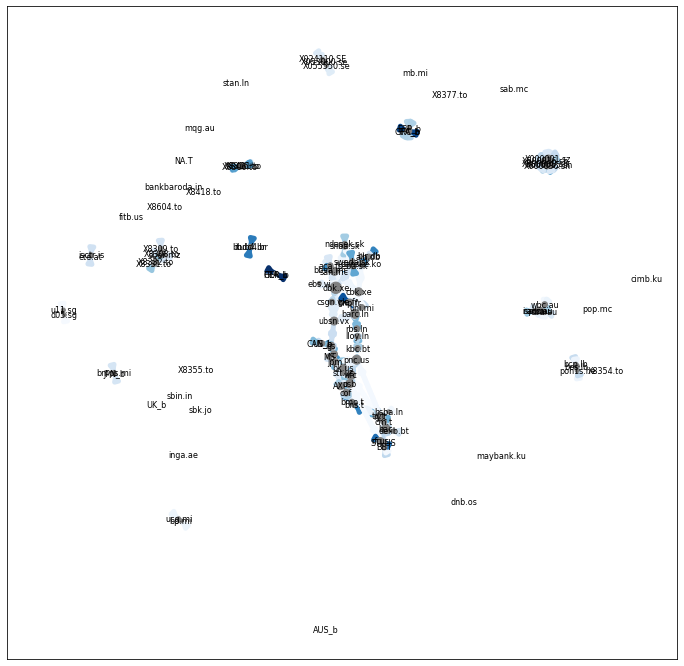

In [49]:
# Draw network
nx.draw_networkx(G,node_pos,
                     #nodelist=degree_mcc_network.keys(),
                     node_size=[v * 8 for v in degree_demirer.values()],
                     #node_color=colors,
                     font_size=8, node_color='grey',
                 edgelist=edges,
                 edge_color=weights,
                 width=5.0, edge_cmap=plt.cm.Blues,
                     with_labels=True)

plt.savefig('./Figures/Demirer_network_{}_{}_{}.pdf'.format(ts_type,method,date),dpi = 120)

In [52]:
# equivalently
GI = igraph.Graph.TupleList(G.edges(), directed=False)
layout = forceatlas2.forceatlas2_igraph_layout(GI, pos=None, iterations=2000)
igraph.plot(GI).show()

100%|██████████| 2000/2000 [00:00<00:00, 3438.58it/s]


BarnesHut Approximation  took  0.16  seconds
Repulsion forces  took  0.26  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.07  seconds


Method: NS


/Users/MacBook/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/MacBook/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/Users/MacBook/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
/Users/MacBook/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable ins

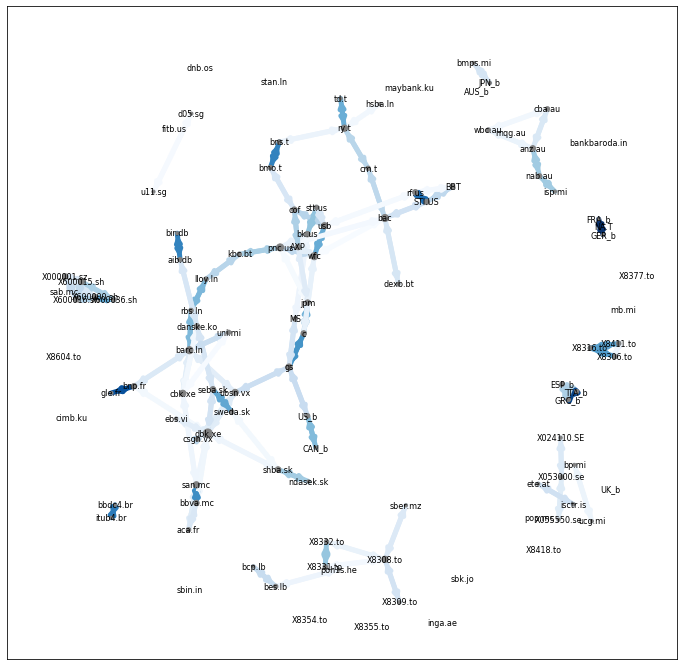

Method: DY_Lasso


/Users/MacBook/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/MacBook/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/Users/MacBook/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
/Users/MacBook/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable ins

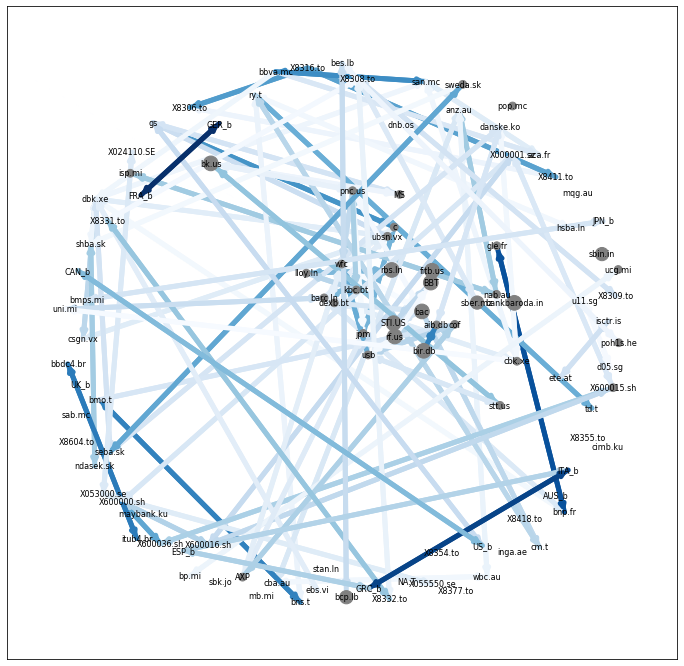

In [53]:
# Iterable (Methods to check)
methods = ["NS","DY_Lasso"]

# Other parameters
date = "2008-09-15"
ts_type = "volatility"

for method in methods:
    
    print("Method: {}".format(method))
    
    # Import network
    G = network_preprocessing(date,method,ts_type)
    
    label_dict = {}

    for i in range(0,len(var_names)):
        label_dict[i] = var_names[i]

    # Relabel network
    G = nx.relabel_nodes(G, label_dict)
    
    
    # Parameters
    plt.rcParams['figure.figsize'] = (12,12)

    # Get degrees
    degree_demirer = dict(G.degree)

    # Draw network
    nx.draw_networkx(G,
                         #nodelist=degree_mcc_network.keys(),
                         node_size=[v * 5 for v in degree_demirer.values()],
                         #node_color=colors,
                         font_size=8, node_color='grey',
                     edgelist=edges,
                     edge_color=weights,
                     width=5.0, edge_cmap=plt.cm.Blues,
                         with_labels=True)

    plt.savefig('./Figures/Demirer_network_{}_{}_{}.pdf'.format(ts_type,method,date),dpi = 120)
    plt.show()